# Algoritmos de ordenamiento

- Clase 24 - 8/11/2021 - Emiliano López
- Temas del día:
    - Método de la burbuja (v1, v2 y v3)
    - Método por inserción
    - Método por selección

## Ordenar 

- Ordenar datos significa reacomodarlos según algún criterio. Por ejemplo, ordenar números en forma ascendente (de menor a mayor).
- Existen diferentes algoritmos de ordenamiento, cada uno con sus fortalezas y debilidades 
    

- ¿Cómo vamos a evaluar a cada algoritmo?

- Tiempo que demora en ordenar
    - Datos desordenados
    - En el peor de los casos (invertido su órden)
    - En el mejor de los casos (ya se encuentra ordenado)

Vamos a:
- Calcular el tiempo de un algoritmo (módulo `time`)
- Generar listas de datos desordenados (módulo `random`)
- Programar los métodos de ordenamiento y evaluarlos

In [1]:
import time
import random

import plotly.graph_objects as go

**¿Cómo evaluamos la bondad del método?**

- Por ahora: midiendo el tiempo que demora
- **OJO**: lo importante es el órden de magnitud: la cantidad de ceros

```python
import time

tini = time.time()               # cronometro desde antes de llamar al método
METODO_DE_ORDENAMIENTO           # llamo al método
tfin = time.time()               # cronometro después de llamar al método

print(f"Tiempo:{tfin-tini} seg") # calculo tiempo total restanto tfin-tini
```

In [2]:
# veamos un ejemplo sobre cómo calcular la demora de un fragmento de programa

for j in range(10):
    tini = time.time()         # << ----- desde
    a = 0                       
    for i in range(1000000):
        a = a + i
    tfin = time.time()         # << ----- hasta 

    print(f"Demora: {tfin-tini} seg.")

Demora: 0.07393050193786621 seg.
Demora: 0.061025142669677734 seg.
Demora: 0.06271648406982422 seg.
Demora: 0.06115865707397461 seg.
Demora: 0.059180498123168945 seg.
Demora: 0.060158491134643555 seg.
Demora: 0.05754733085632324 seg.
Demora: 0.05808210372924805 seg.
Demora: 0.06620407104492188 seg.
Demora: 0.06180071830749512 seg.


In [3]:
# esta será nuestra lista de k datos desordenados
k = 1000
datos_desordenados = random.sample(range(k), k)

In [4]:
fig = go.Figure()
fig.add_trace(go.Bar(y=datos_desordenados))

## Método de la Burbuja
- Itera sobre todos los valores numéricos de la lista
- Compara cada número con el siguiente y los intercambia si están desordenados
- Su nombre se debe a que los valores mas grandes burbujean hasta el fondo y los menores se mueven al comienzo de la lista

- Ordenamiento de menor a mayor
![SegmentLocal](img/Bubble-sort-example-300px.gif "bubblesort")

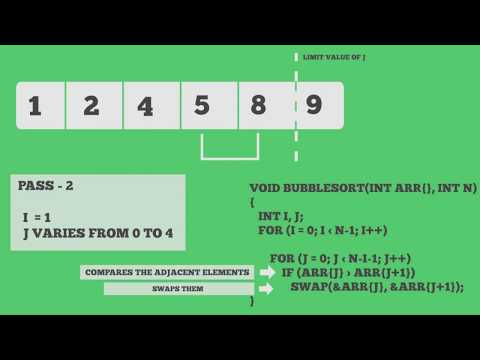

In [5]:
from IPython.display import YouTubeVideo
YouTubeVideo('nmhjrI-aW5o', width='800', height='600')

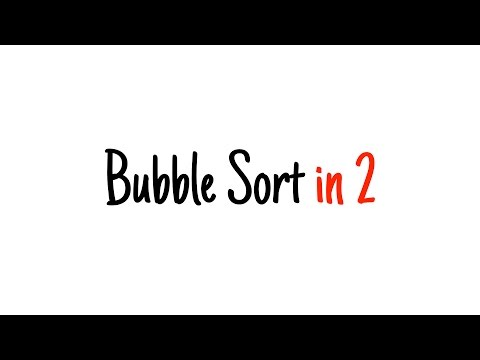

In [6]:
YouTubeVideo('xli_FI7CuzA', width='800', height='600')

In [7]:
datos = [32, 1, 9, 6]
# 1ra pasada
datos = [1, 9, 6, 32]
# 2da pasada
datos = [1, 6, 9, 32]
#3

In [8]:
fig = go.Figure()
fig.add_trace(go.Bar(y=datos))

In [2]:
# NO ES IMPORTANTE ENTENDER ESTA FUNCION!!!
# voy a usar un decorador para medir el tiempo de cada función
def mide_tiempo(funcion):
    """esta función mide el tiempo de otra función y se la usa como decorador, no son importantes los detalles"""
    def funcion_medida(*args, **kwargs):
        inicio = time.time()
        c = funcion(*args, **kwargs)
        print(f"tiempo: {time.time() - inicio}")
        return c
    return funcion_medida

In [3]:
@mide_tiempo
def ordena_burbuja(datos):
    """método de ordenamiento burbuja basico"""
    N = len(datos)
    for j in range(N-1):     # el for externo es el de las pasadas
        for i in range(N-1): # el for interno es el de las comparaciones
            if datos[i] > datos[i+1]:
                datos[i], datos[i+1] = datos[i+1], datos[i] 
    return datos

In [11]:
# acá tengo una copia de mis datos desordenados
datos = datos_desordenados.copy() 
# los ordeno
datos = ordena_burbuja(datos)   # <- aca invoco al método burbuja básico
fig = go.Figure()
fig.add_trace(go.Bar(y=datos))

tiempo: 0.09384965896606445


### ¿Funciona con una lista de `str`?

In [5]:
d = ["axaa", "zza", "fcv", "a", "ab", "ac", "az"]
ordena_burbuja(d)

tiempo: 6.9141387939453125e-06


['a', 'ab', 'ac', 'axaa', 'az', 'fcv', 'zza']

In [12]:
# lo invoco con los datos YA ordenados
datos = ordena_burbuja(datos)   # <- aca invoco al método burbuja básico

tiempo: 0.05713629722595215


In [13]:
# lo invoco con los datos desordenados en el PEOR caso
datos = datos[::-1]             # lo invertí para eso
#mi_plot(datos)
datos = ordena_burbuja(datos)   # <- aca invoco al método burbuja básico

tiempo: 0.09732532501220703


**¿¿Es posible mejorarlo??**

**Luego de cada pasada, ¿qué hay en el final de la lista?**

## Burbuja mejorado v1

In [14]:
@mide_tiempo
def ordena_burbuja_mejorado1(datos):
    """método de ordenamiento burbuja mejorado 1"""
    N = len(datos)
    for j in range(N-1):
        for i in range(N-1-j):    ## <<---- ATENCION AQUI!!
            if datos[i] > datos[i+1]:
                datos[i], datos[i+1] = datos[i+1], datos[i] 
    return datos    

- **¿Es posible mejorarlo?**
- **¿y si ya estaba ordenado?**

## Burbuja mejorado v2

In [15]:
@mide_tiempo
def ordena_burbuja_mejorado2(datos):
    """método de ordenamiento burbuja mejorado 2"""
    N = len(datos)
    for j in range(N-1):
        no_intercambios = True
        for i in range(N-1-j):
            if datos[i] > datos[i+1]:
                datos[i], datos[i+1] = datos[i+1], datos[i] 
                no_intercambios = False
        if no_intercambios:
            return datos
    return datos    

### Análisis métodos de la burbuja

In [16]:
# con los datos ordenados mejora?
datos = ordena_burbuja_mejorado1(datos)

tiempo: 0.03317618370056152


In [17]:
# con los datos ordenados mejora?
datos = ordena_burbuja_mejorado2(datos)

tiempo: 8.130073547363281e-05


## Método por selección
- Busca el menor elemento del arreglo y lo intercambia con el de la primera posición
- Luego, el segundo menor y lo intercambia con el de la segunda posición
- Así hasta finalizar

![SegmentLocal](img/Selection-Sort-Animation.gif "selectionsort")

In [18]:
@mide_tiempo
def ordena_seleccion(datos):
    N = len(datos)
    for i in range(N):
        pos_minimo = i
        for j in range(pos_minimo + 1, N):
            if datos[j] < datos[pos_minimo]:
                pos_minimo = j
        datos[i], datos[pos_minimo] = datos[pos_minimo], datos[i] 

In [19]:
datos = datos_desordenados.copy()
ordena_seleccion(datos)

tiempo: 0.026821136474609375


## Método por inserción
- Similar a como se haría con un mazo de cartas

![SegmentLocal](img/Insertion-sort-example-300px.gif "sortinsertion")

In [20]:
@mide_tiempo
def ordena_insercion(datos):
    """método ordenamiento inserción"""
    for indice_eval in range(1, len(datos)):
        valor_eval = datos[indice_eval]
        indice_insertar = indice_eval
        while indice_insertar > 0 and datos[indice_insertar - 1] > valor_eval:
            datos[indice_insertar] = datos[indice_insertar - 1]
            indice_insertar = indice_insertar - 1
        datos[indice_insertar] = valor_eval

In [21]:
datos = datos_desordenados.copy()
ordena_insercion(datos)

tiempo: 0.03157186508178711


In [22]:
otros_datos = datos_desordenados.copy()
# comparar el tiempo de demora de la función sorted() de la lib estándar de python
otros_datos = sorted(otros_datos)

## Desafío
- Probar de modificar para que ordene con una lista que contiene `str` (ordenar alfabéticamente)